In [233]:
# Example calulations using Yield Stress Prediction Module

In [234]:
%run Yield_Stress_Prediction_Module.ipynb

In [235]:
!jupyter nbconvert --to script Yield_Stress_Prediction_Module.ipynb

[NbConvertApp] Converting notebook Yield_Stress_Prediction_Module.ipynb to script
[NbConvertApp] Writing 13161 bytes to Yield_Stress_Prediction_Module.py


In [236]:
# Import all functions from yield stress prediction module

from Yield_Stress_Prediction_Module import *

In [237]:
# Provide Elemental Data for Radii, Atomic volume, Shear Modulus and Poisson Ratio

Elemental_data = {
    "Goldschmidt Radii": {'Ni':1.24, 'Co':1.25, 'Fe':1.26, 'Mn':1.27, 'Cr':1.28},
    "Atomic Volume": {'Ni':10.94, 'Co':11.12, 'Fe':12.09, 'Mn':12.60, 'Cr':12.27},
    "Shear Modulus": {'Ni':76, 'Co':76, 'Fe':82, 'Mn':44, 'Cr':115},
    "Poisson Ratio": { 'Ni':0.31, 'Co':0.31, 'Fe':0.28, 'Mn':0.26, 'Cr':0.21}
}


# Enthalpy Matrix for CANTOR consituents

enthalpy_matrix = ([['Ni', 'Co', 'Fe', 'Mn', 'Cr'],
                    [0,    -21,  -97, -115,  -31],
                    [-21,    0,  -60,  -19,    5],
                    [-97,  -60,    0,    9,   -8],
                    [-115, -19,    9,    0, -110],
                    [-30,    5,   -8, -110,    0]])

In [238]:
# Enter a composition

Composition = {"Co": 0.33, "Cr": 0.33, "Fe": 0.34}

In [239]:
yield_stress = calculate_yield_stress(Composition, 200, "delta")

print("Yield Stress at 200k:", + round(yield_stress, 2), "MPa")

Yield Stress at 200k: 60.29 MPa


In [240]:
enthalpy = get_enthlapy(enthalpy_matrix, Composition)

print("Mixing Enthalpy of Composition", + round(enthalpy, 2), "KJ/mol")

Mixing Enthalpy of Composition -28.34 KJ/mol


In [241]:
entropy = get_entropy(Composition)

print("Ideal Entropy of mixing of Composition", + round(entropy, 2), "Kmol/J")

Ideal Entropy of mixing of Composition 9.13 Kmol/J


In [242]:
# Vary temperature 
temps, yield_stress = vary_temperature(Composition, 0, 600, 100, 'volume')

Text(0, 0.5, 'Yield Stress (MPa)')

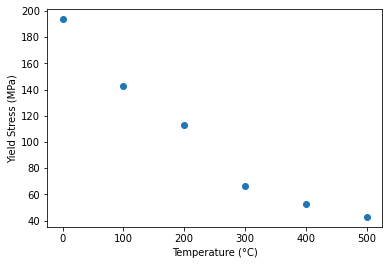

In [243]:
# Plot yield stress variation with temperature

plt.scatter(temps, yield_stress)
plt.xlabel("Temperature (°C)")
plt.ylabel("Yield Stress (MPa)")

In [244]:
# Generate all possible equiatomic compoistions from CANTOR elements (Fe, Cr, Co, Mn, Ni)

possible_compoistions = all_unique_combinations(Elemental_data)

print(possible_compoistions)

[{'Ni': 0.33, 'Co': 0.33, 'Fe': 0.34}, {'Ni': 0.33, 'Co': 0.33, 'Mn': 0.34}, {'Ni': 0.33, 'Co': 0.33, 'Cr': 0.34}, {'Ni': 0.33, 'Fe': 0.33, 'Mn': 0.34}, {'Ni': 0.33, 'Fe': 0.33, 'Cr': 0.34}, {'Ni': 0.33, 'Mn': 0.33, 'Cr': 0.34}, {'Co': 0.33, 'Fe': 0.33, 'Mn': 0.34}, {'Co': 0.33, 'Fe': 0.33, 'Cr': 0.34}, {'Co': 0.33, 'Mn': 0.33, 'Cr': 0.34}, {'Fe': 0.33, 'Mn': 0.33, 'Cr': 0.34}, {'Ni': 0.25, 'Co': 0.25, 'Fe': 0.25, 'Mn': 0.25}, {'Ni': 0.25, 'Co': 0.25, 'Fe': 0.25, 'Cr': 0.25}, {'Ni': 0.25, 'Co': 0.25, 'Mn': 0.25, 'Cr': 0.25}, {'Ni': 0.25, 'Fe': 0.25, 'Mn': 0.25, 'Cr': 0.25}, {'Co': 0.25, 'Fe': 0.25, 'Mn': 0.25, 'Cr': 0.25}, {'Ni': 0.2, 'Co': 0.2, 'Fe': 0.2, 'Mn': 0.2, 'Cr': 0.2}]


In [245]:
# Calculate Yield Stress for each composition

yield_stresses, Labels = vary_composition(possible_compoistions, 298, "volume")

In [246]:
# Calculate Delta misfit param for each composition

deltas = get_deltas(possible_compoistions, Elemental_data)

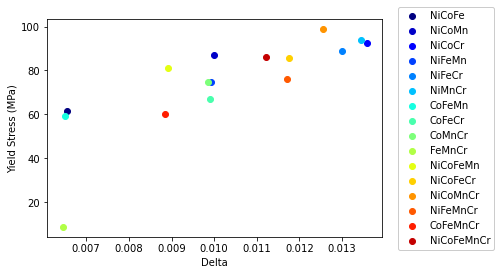

In [247]:
# Plot yield stress variation and delta misfit with composition labels

labelled_plot(deltas, yield_stresses, "Delta", "Yield Stress (MPa)", Labels)

In [248]:
Entropys = []

Enthalpys = []

for composition in possible_compoistions:
    entropy = get_entropy(composition)
    Entropys.append(entropy)
    
    enthalpy = get_enthlapy(enthalpy_matrix, composition)
    Enthalpys.append(enthalpy)


print(Entropys)

[9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 9.133542089869557, 11.526292643075523, 11.526292643075523, 11.526292643075523, 11.526292643075523, 11.526292643075523, 13.381611358925287]


In [249]:
# Run Get Median Experimental Yields script

%run Get_Median_Experimental_Yields.ipynb

/tmp/ipykernel_111/1747206503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CANTOR_elements_df.loc[:, 'Alphabetical Formula'] = CANTOR_elements_df['FORMULA'].apply(lambda f: ''.join(sorted(f)))
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will b

{'CFNeio': 210.0, 'CCFNeior': 273.0, 'CCMNinor': 282.0, 'CCNior': 471.5, 'CFMNeino': 170.0, 'CMNino': 321.0, 'FMNein': 407.0, 'CCFMNeinor': 378.7}
['NiCoFe', 'NiCoMn', 'NiCoCr', 'NiFeMn', 'NiFeCr', 'NiMnCr', 'CoFeMn', 'CoFeCr', 'CoMnCr', 'FeMnCr', 'NiCoFeMn', 'NiCoFeCr', 'NiCoMnCr', 'NiFeMnCr', 'CoFeMnCr', 'NiCoFeMnCr']
{'NiCoFe': 'CFNeio', 'NiCoMn': 'CMNino', 'NiCoCr': 'CCNior', 'NiFeMn': 'FMNein', 'NiFeCr': 'CFNeir', 'NiMnCr': 'CMNinr', 'CoFeMn': 'CFMeno', 'CoFeCr': 'CCFeor', 'CoMnCr': 'CCMnor', 'FeMnCr': 'CFMenr', 'NiCoFeMn': 'CFMNeino', 'NiCoFeCr': 'CCFNeior', 'NiCoMnCr': 'CCMNinor', 'NiFeMnCr': 'CFMNeinr', 'CoFeMnCr': 'CCFMenor', 'NiCoFeMnCr': 'CCFMNeinor'}
{'NiCoFe': 210.0, 'NiCoFeCr': 273.0, 'NiCoMnCr': 282.0, 'NiCoCr': 471.5, 'NiCoFeMn': 170.0, 'NiCoMn': 321.0, 'NiFeMn': 407.0, 'NiCoFeMnCr': 378.7}


/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CANTOR_RT_df = CANTOR_RT_df.append(row, ignore_index=True)
/tmp/ipykernel_111/272123220.py:7: FutureWarning: The frame.append method is depreca

In [250]:
print(experimental_data)

{'NiCoFe': 210.0, 'NiCoFeCr': 273.0, 'NiCoMnCr': 282.0, 'NiCoCr': 471.5, 'NiCoFeMn': 170.0, 'NiCoMn': 321.0, 'NiFeMn': 407.0, 'NiCoFeMnCr': 378.7}


In [251]:
# To calualate theoretical data for comparison to experimental we need to get all experimental compositions

experimental_compositions = []

for composition in experimental_data.keys():
    
    # Split elements e.g. FeCrCo -> Fe, Cr, Co     
    split = re.findall('[A-Z][^A-Z]*', composition)
    
    # Calculate ratios of elements    
    if len(split) == 3:
        comp = {split[0]: 0.33, split[1]: 0.33, split[2]: 0.34}
    else:
        ratio = 1.0 / len(split)  # equal ratio for all elements
        comp = {e: ratio for e in split}
    
    experimental_compositions.append(comp)
    
print(experimental_compositions)

[{'Ni': 0.33, 'Co': 0.33, 'Fe': 0.34}, {'Ni': 0.25, 'Co': 0.25, 'Fe': 0.25, 'Cr': 0.25}, {'Ni': 0.25, 'Co': 0.25, 'Mn': 0.25, 'Cr': 0.25}, {'Ni': 0.33, 'Co': 0.33, 'Cr': 0.34}, {'Ni': 0.25, 'Co': 0.25, 'Fe': 0.25, 'Mn': 0.25}, {'Ni': 0.33, 'Co': 0.33, 'Mn': 0.34}, {'Ni': 0.33, 'Fe': 0.33, 'Mn': 0.34}, {'Ni': 0.2, 'Co': 0.2, 'Fe': 0.2, 'Mn': 0.2, 'Cr': 0.2}]


In [252]:
# Calculate yield stress for each composition
yield_stresses, labels = vary_composition(experimental_compositions, 298, "volume")

# Calculate Delta misfit param for each composition
deltas = get_deltas(experimental_compositions, Elemental_data)

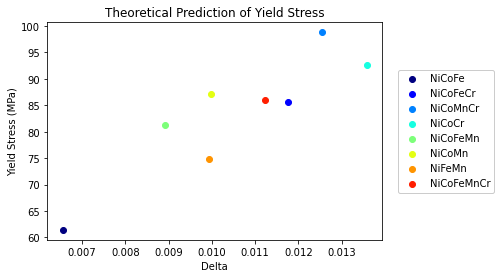

In [253]:
plt.title("Theoretical Prediction of Yield Stress")
labelled_plot(deltas, yield_stresses, "Delta", "Yield Stress (MPa)", labels)


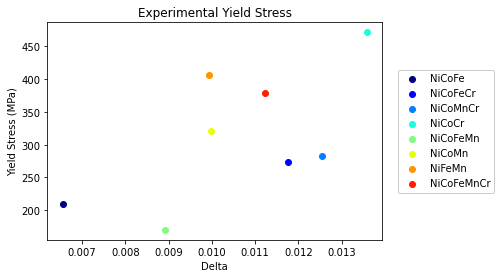

In [254]:
exp_yields = list(experimental_data.values())

plt.title("Experimental Yield Stress")
labelled_plot(deltas, exp_yields, "Delta", "Yield Stress (MPa)", expLabels)

In [255]:
Entropys = []

Enthalpys = []

for composition in experimental_compositions:
    entropy = get_entropy(composition)
    Entropys.append(entropy)
    
    enthalpy = get_enthlapy(enthalpy_matrix, composition)
    Enthalpys.append(enthalpy)



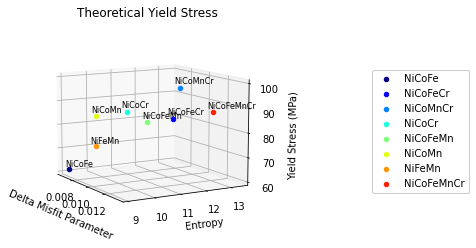

In [256]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# create lists for the legend
legend_colors = []
legend_labels = []
    
# iterate over the data points
for i in range(len(deltas)):
    # create a scatter plot for each point with a unique color
    color = plt.cm.jet(i/len(deltas))
    ax.scatter(deltas[i], Entropys[i], yield_stresses[i], color=color)

    # append the color and label to the legend lists
    legend_colors.append(color)
    legend_labels.append(labels[i])
    
    ax.text(deltas[i], 0.98*Entropys[i], 1.02*yield_stresses[i], labels[i], fontsize=8)

ax.set_title("Theoretical Yield Stress")

# add legend
ax.legend(legend_labels, facecolor='white', framealpha=1, ncol=1, bbox_to_anchor=(2, 0.5), loc='center right')

# set the labels for the axes
ax.set_xlabel("Delta Misfit Parameter")
ax.set_ylabel("Entropy")
ax.set_zlabel("Yield Stress (MPa)")
ax.view_init(elev=10, azim=330) 
# show the plot
plt.show()

Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
1.0000000000000002
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
1.0000000000000002
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
1.0000000000000002
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
1.0000000000000002
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
0.9999999999999999
Incorrect Composition: total composition does not equal 1
1.0000000000000002
Incorrect Composition: total composition does not equal 1
0.9999999999999999

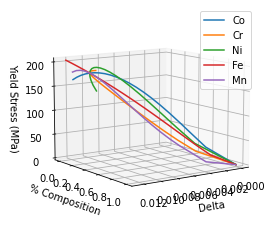

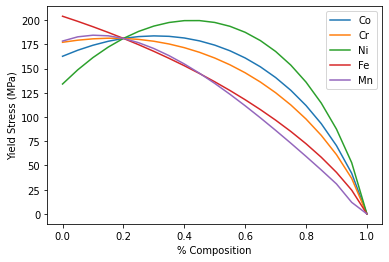

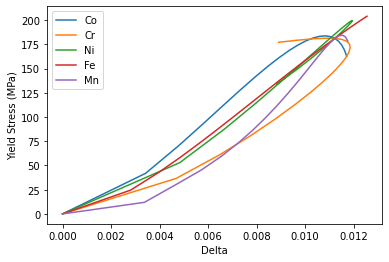

In [272]:
import copy

CANTOR = {"Co": 0.2, "Cr": 0.2, "Ni": 0.2, "Fe": 0.2, "Mn": 0.2}

elements = list(CANTOR.keys())


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for element in elements:
    compositions = []

    concentrations =  np.arange(0, 1.05, 0.05)
    
    for concentration in concentrations:
        other_ratios = (1 - concentration) / 4
        
        composition = copy.deepcopy(CANTOR)
        
        for ele in composition:
            if ele == element:
                composition[ele] = concentration
            else:
                composition[ele] = other_ratios
        
        compositions.append(composition)
        
    y, l = vary_composition(compositions, 100, 'volume')
    
    deltas = get_deltas(compositions, Elemental_data)
    
    plt.figure('1')
    plt.plot(concentrations, y, label = element)
    
    plt.xlabel("% Composition")
    plt.ylabel("Yield Stress (MPa)")
    plt.legend()
    
    
    plt.figure('2')
    plt.plot(deltas, y, label = element)
    
    plt.xlabel("Delta")
    plt.ylabel("Yield Stress (MPa)")
    
    plt.legend()
    
    ax.plot(deltas, concentrations, y, label=element)

ax.set_xlabel('Delta')
ax.set_ylabel('% Composition')
ax.set_zlabel('Yield Stress (MPa)')
ax.legend()

ax.view_init(elev=10, azim=55)
plt.show()